In [1]:
import pandas as pd
import numpy as np

In [2]:
df= pd.read_csv('shopping_data.csv')

In [3]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
df.columns

Index(['CustomerID', 'Genre', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [6]:
from sklearn.preprocessing import LabelEncoder
lbl=LabelEncoder()

In [7]:
df['Genre']=lbl.fit_transform(df['Genre'])

In [8]:
df['Genre'].head()

0    1
1    1
2    0
3    0
4    0
Name: Genre, dtype: int32

In [9]:
labels = df['Genre']
print(np.unique(labels.values))

[0 1]


In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

<AxesSubplot:>

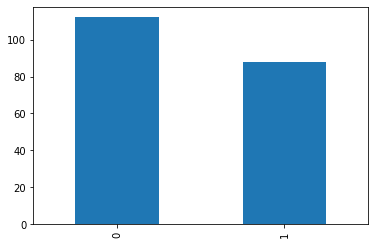

In [11]:
fig,ax =plt.subplots()
(labels.value_counts()).plot(ax=ax,kind='bar')

In [12]:
from sklearn.cluster import AgglomerativeClustering
agc=AgglomerativeClustering(n_clusters=2)

In [13]:
features=df[['CustomerID', 'Genre', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)']]
agc.fit(features)

AgglomerativeClustering()

In [14]:
agc.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int64)

In [15]:
print(np.unique(agc.labels_))

[0 1]


In [16]:
print(np.unique(labels))

[0 1]


In [17]:
from sklearn.metrics import mean_squared_error
score=mean_squared_error(labels,agc.labels_)

In [18]:
abs_mean=np.sqrt(score)

In [19]:
print(abs_mean)

0.6708203932499369
